<a href="https://colab.research.google.com/github/tanmayzalke26/Machine_Learning_Practicals/blob/main/Practical_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('Mall_Customers.csv')
file_path= "/content/Mall_Customers.csv"
df = pd.read_csv('Mall_Customers.csv')

print("First Few Rows of the dataset")
print(df.head())

First Few Rows of the dataset
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


<ipython-input-7-21e5ff65f40e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


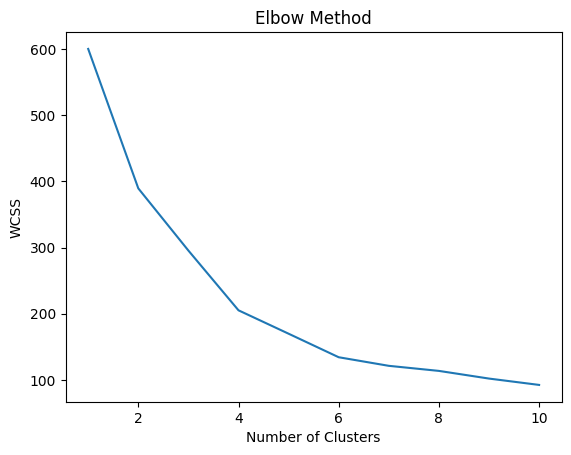

In [7]:
for column in data.select_dtypes(include=['number']).columns:
    data[column].fillna(data[column].mean(), inplace=True)

X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares

# Try different cluster numbers (e.g., 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


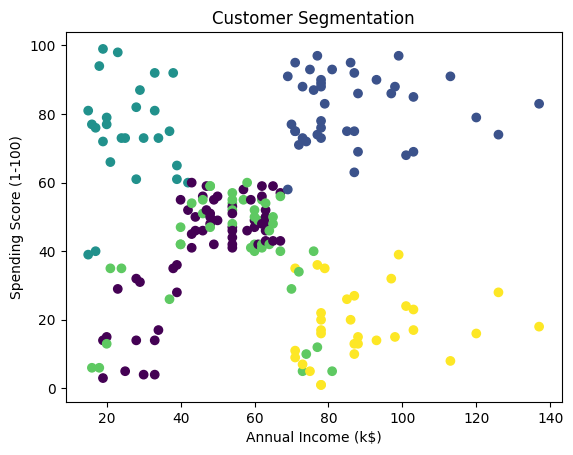

In [8]:
optimal_num_clusters = 5  # Replace with the optimal number from the Elbow Method

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')  # Updated column names
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()